Data Wrangling: \
Importing libraries, and loading the data. 

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [119]:
data=pd.read_csv(r'train.csv')

Exploring the structure of the data, and checking the missing values if any. 

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [121]:
missing_data = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()],axis=1)
missing_data.columns=['count', '%']
missing_data.sort_values(by=['count', '%'],ascending=False).head(20)

,count,%
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


Using the dataset description, We can see that for the PoolQc column Nan means "No Pool", for MiscFeature Nan means " None ", for Alley Nan mean " No Alley Access ", and so on. So we need a better way to fix those rather than leaving them as Na. \
In the case if PoolQC, and MiscFeature, we can see that they are missing over 95% of their values, which means the supermajoriy have the same value and it will not provide us with a lot of information, so we should drop them. Similarly, for Fence and Alley, we see that they are having minimal variation between their values as well as having most of their values represnting lack of the feature. Finally, FireplaceQu have about 50% of its value missing. and the feature does not seem like something that might have a huge influnce on the price, so we might as well drop it too. 

In [122]:
data.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], inplace=True)

In [123]:
data['Id'].unique().shape

(1460,)

In [124]:
data.shape

(1460, 76)

In [125]:
missing_data = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()],axis=1)
missing_data.columns=['count', '%']
missing_data.sort_values(by=['count', '%'],ascending=False).head(15)

,count,%
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945
GarageCond,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
BsmtQual,37,2.534247
BsmtCond,37,2.534247


We have 14 columns with Nan values and we need to address them. Unfortuantly the documantaion associated with the data set does not say anything about NaN values for LotFrontage. We are only missing 17.7% from that feature and it doesn't seem like something we can just drop. 
<br>
We know that the 81 missing values for GrageType mean "No Garage", which also tell us that the same thing is happening for the other Garage related missing values. 
<br>
Similarly for all the missing features related to the basement masonry veneer. 
<br>
Finally, there is a missing value for Electrical, which is not documented but we have no way of dealing with it currently

In [126]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

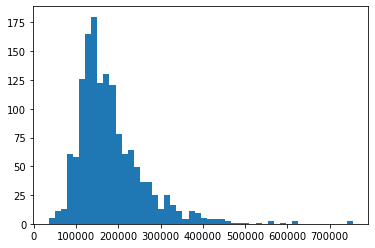

In [127]:
x=plt.hist(data['SalePrice'],bins=50)

In [128]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


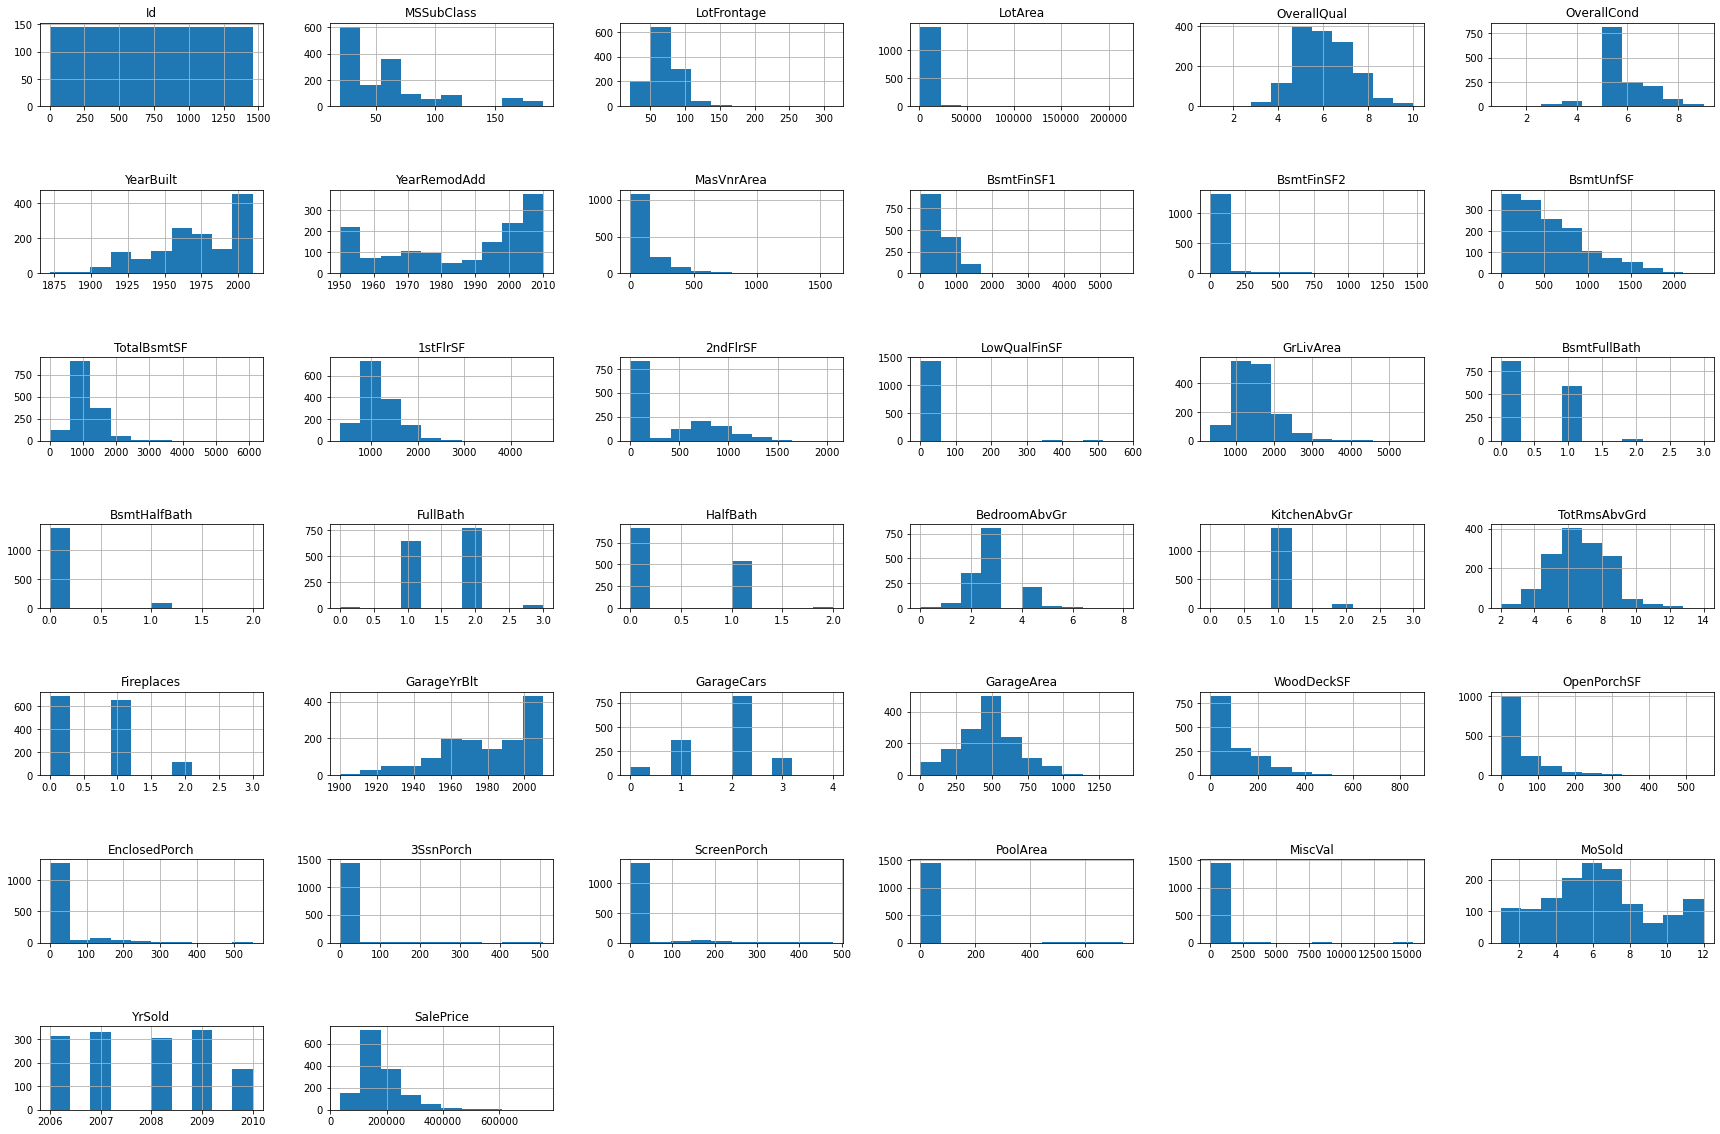

In [129]:
data.hist(figsize=(30,20))
plt.subplots_adjust(hspace=1);

From these graphs, we can see that:/
MSSubClass has distincit values, and it's within the expected range based off of documantations, /
However, let's check LotFrontage, and LotArea

In [130]:
data.LotFrontage[data.LotFrontage > 200]

934     313.0
1298    313.0
Name: LotFrontage, dtype: float64

In [131]:
data.LotArea[data.LotFrontage>200]

934     27650
1298    63887
Name: LotArea, dtype: int64

In [132]:
data.LotArea[data.LotArea>100000]

249    159000
313    215245
335    164660
706    115149
Name: LotArea, dtype: int64

In [133]:
data.LotFrontage[data.LotArea>100000]

249      NaN
313    150.0
335      NaN
706      NaN
Name: LotFrontage, dtype: float64

Based off of the area for the properties with high lot frontage, it does seem plausiable, but we are missing the lot frontage of the properties with high lot area. So we can address that later on.

In [134]:
data.MasVnrArea[data.MasVnrArea>1000]

58      1031.0
70      1115.0
115     1129.0
297     1600.0
691     1170.0
808     1047.0
1169    1378.0
Name: MasVnrArea, dtype: float64

In [135]:
data.BsmtFinSF1[data.BsmtFinSF1>3000]

1298    5644
Name: BsmtFinSF1, dtype: int64

In [136]:
data.LotArea[data.BsmtFinSF1>3000]

1298    63887
Name: LotArea, dtype: int64

In [137]:
data.BsmtFinSF2[data.BsmtFinSF2>1000]

153     1080
271     1063
322     1474
470     1120
542     1127
764     1057
854     1085
924     1061
1253    1031
1458    1029
Name: BsmtFinSF2, dtype: int64

In [138]:
data.TotalBsmtSF[data.TotalBsmtSF<data.BsmtFinSF1]

Series([], Name: TotalBsmtSF, dtype: int64)

In [139]:
data.LowQualFinSF[data.LowQualFinSF>100]

51      360
88      513
125     234
170     528
185     572
187     144
197     392
198     371
263     390
267     420
406     473
589     156
635     515
729     360
873     232
883     481
945     120
1009    514
1031    397
1173    479
1349    205
1440    384
Name: LowQualFinSF, dtype: int64

So far, it doesn't seem to be many values that don't make sense. We have to question some of the values and their validaty, but we don't have to replace these right now. Let's see now how many missing values per row

In [140]:
missing_per_row = pd.concat([data.isnull().sum(axis=1), 100 * data.isnull().mean(axis=1)], axis=1)
missing_per_row.columns=['count', '%']
missing_per_row.sort_values(by='count', ascending=False).head(30)

,count,%
1179,10,13.157895
705,10,13.157895
1011,10,13.157895
520,10,13.157895
1218,10,13.157895
533,10,13.157895
39,10,13.157895
287,6,7.894737
307,6,7.894737
1407,6,7.894737


As we can see here, the rows with the most missing values have 10 missing values, but this most likely means that these properties lack a garage and a basement which would lead to 10 missing values, so it makes sense with everything we've been doing so far.

Now we can shift our focus to the missing values of LotFrontage. Since it has an almost normal distribution, we can assign the values to the mean

In [141]:
LFmean=data['LotFrontage'].mean()
data.loc[data['LotFrontage'].isnull(),'LotFrontage']=LFmean

For the Garage related columns, we know that the null values are related for ones with no information about the garage, so we can simply replace that by None for the string columns, and the year built we'll use a large number to indicate the fact that there is no garage

In [142]:
data.loc[data['GarageType'].isnull(),['GarageType','GarageFinish','GarageQual','GarageCond']]='None'

In [143]:
data.loc[data['GarageYrBlt'].isnull(),'GarageYrBlt']=9999

In [144]:
data['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

We can do the same thing to the basement related columns, and we have 5 string type columns here as well

In [145]:
data.loc[data['BsmtQual'].isnull(),['BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtCond']]

,BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond,BsmtCond
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


In [146]:
data.loc[data['BsmtQual'].isnull(),['BsmtQual','BsmtCond','BsmtFinType1']]='None'
data.loc[data['BsmtExposure'].isnull(),'BsmtExposure']='None'
data.loc[data['BsmtFinType2'].isnull(),'BsmtFinType2']='None'

Unfortuantly, for the electrical, we do not have the same inforamtion, so we will have to settle for choosing something for it. Safest option is to assign it to the most common type

In [147]:
data['Electrical'].value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [148]:
data.loc[data['Electrical'].isnull(),'Electrical']='SBrkr'

Finally the for MasVnrType, we see some value having None, and some being NaN. Since we don't have a lot to go by, we can just assume that the value is None

In [149]:
data['MasVnrType'].value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [150]:
data.loc[data['MasVnrType'].isnull(),'MasVnrType']='None'
data.loc[data['MasVnrArea'].isnull(),'MasVnrArea']=0

In [151]:
missing_data = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()],axis=1)
missing_data.columns=['count', '%']
missing_data.sort_values(by=['count', '%'],ascending=False).head(15)

,count,%
Id,0,0.0
MSSubClass,0,0.0
MSZoning,0,0.0
LotFrontage,0,0.0
LotArea,0,0.0
Street,0,0.0
LotShape,0,0.0
LandContour,0,0.0
Utilities,0,0.0
LotConfig,0,0.0


We can see that we finally don't have any missing values, so we can move on to the next step as we are done with the data cleaning.

In [152]:
data.to_csv('data_clean.csv', header=False, index=False)